In [14]:
import geopandas as gp
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
!mv /Users/fbianco/Downloads/Zipcode_boundary_scag_2009.zip .
!unzip Zipcode_boundary_scag_2009.zip

Archive:  Zipcode_boundary_scag_2009.zip
  inflating: Zipcode_boundary_scag_2009.shp  
  inflating: Zipcode_boundary_scag_2009.shp.xml  
  inflating: Zipcode_boundary_scag_2009.shx  
  inflating: Zipcode_boundary_scag_2009.dbf  
  inflating: Zipcode_boundary_scag_2009.prj  
  inflating: Zipcode_boundary_scag_2009.sbn  
  inflating: Zipcode_boundary_scag_2009.sbx  


In [19]:
cbSanB = gp.GeoDataFrame.from_file("Zipcode_boundary_scag_2009.shp")

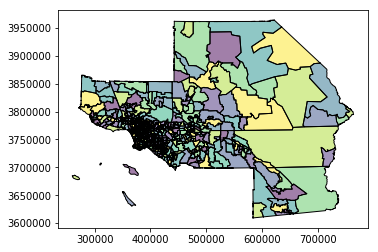

In [20]:
cbSanB.plot()

In [31]:
cbSanB.crs

{'init': u'epsg:26911'}

In [43]:
import shapely
import collections
lat =[34.066131, 34.064033]
lon =[-117.171634, -117.171629]
tweetsloc = gp.GeoDataFrame()
# combine lat and lon to one column
tweetsloc['lonlat']=list(zip(lon,lat))
# Create Point Geometry for based on lonlat column
tweetsloc['geometry']=tweetsloc[['lonlat']].applymap(lambda x: shapely.geometry.Point(list(x)) )
from fiona.crs import from_epsg
#gdf_.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US f
#set coordinate system
tweetsloc.crs  = from_epsg(4326)


In [44]:
#convert coordinates
tweetsloc = tweetsloc.to_crs(epsg=26911)
tweetsloc.head()


,lonlat,geometry
0,"(-117.171634, 34.066131)",POINT (484162.2565172801 3769501.778793237)
1,"(-117.171629, 34.064033)",POINT (484162.3275818447 3769269.153080817)


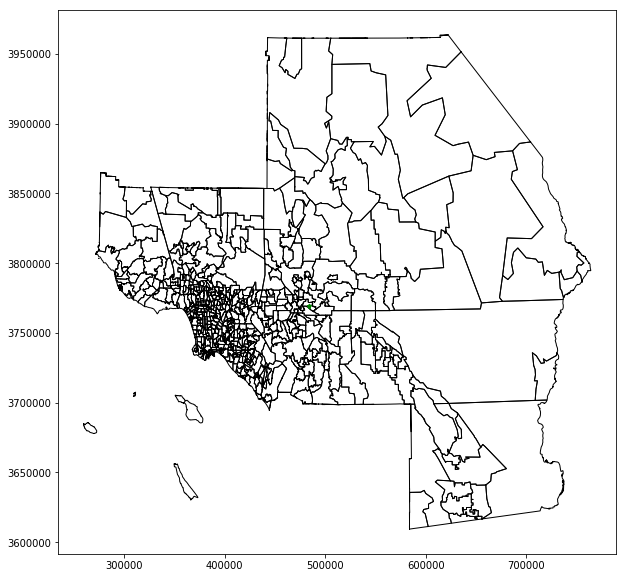

In [59]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
ax = cbSanB.plot(color='white', edgecolor='black', ax=ax);
tweetsloc.plot(marker='*', color='green', markersize=5, ax=ax);
#ax.set_ylim(3675000, 3825000)
#ax.set_xlim(425000, 525000)